In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

### Estonia dataset

In [2]:
df = pd.read_csv('./datasets/estonia-passenger-list-mod_1.csv')

In [3]:
df

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,694,Estonia,MARGUS,PUKSPUU,M,35.0,P,0
1,596,Sweden,BRITT MARGARETA,NILSSON,F,39.0,P,0
2,550,Estonia,IVI,MATSALU,F,58.0,P,0
3,291,Sweden,BIRGIT MARIA,JAKOBSSON,F,67.0,P,0
4,388,Estonia,SAIDYA,KIVILA,F,48.0,C,0
...,...,...,...,...,...,...,...,...
737,262,Sweden,OLOF GUNNAR,HOLMSTROM,M,55.0,P,0
738,919,Estonia,JURI,VASK,M,20.0,C,1
739,822,Sweden,BRITTA ELISABET,STJERNQVIST,F,61.0,P,0
740,220,Sweden,ASA ALFHILD,HAGELBERG,F,47.0,P,0


### Upoznavanje s podatcima

In [4]:
df.describe()

,PassengerId,Age,Survived
count,742.000000,705.000000,742.000000
mean,483.830189,47.500709,0.138814
std,280.969477,41.895505,0.345986
min,1.000000,4.000000,0.000000
25%,243.250000,30.000000,0.000000
50%,481.000000,44.000000,0.000000
75%,719.750000,59.000000,0.000000
max,989.000000,630.000000,1.000000


In [5]:
df.columns

Index(['PassengerId', 'Country', 'Firstname', 'Lastname', 'Sex', 'Age',
       'Category', 'Survived'],
      dtype='object')

In [6]:
df.nunique()

PassengerId    741
Country         14
Firstname      660
Lastname       603
Sex              2
Age             78
Category         2
Survived         2
dtype: int64

In [7]:
# pocisti monotone atribute
df.drop(['PassengerId', 'Firstname', 'Lastname'], axis=1, inplace=True)

In [8]:
df.columns

Index(['Country', 'Sex', 'Age', 'Category', 'Survived'], dtype='object')

### Enkodiranje

#### Label Encoder

In [9]:
# enkodiraj sex
le = LabelEncoder()
le.fit(df.loc[:, 'Sex'])
df.loc[:, 'Sex'] = le.transform(df.loc[:, 'Sex'])

In [10]:
df

,Country,Sex,Age,Category,Survived
0,Estonia,1,35.0,P,0
1,Sweden,0,39.0,P,0
2,Estonia,0,58.0,P,0
3,Sweden,0,67.0,P,0
4,Estonia,0,48.0,C,0
...,...,...,...,...,...
737,Sweden,1,55.0,P,0
738,Estonia,1,20.0,C,1
739,Sweden,0,61.0,P,0
740,Sweden,0,47.0,P,0


In [11]:
# enkodiraj category
le.fit(df.loc[:, 'Category'])
df.loc[:, 'Category'] = le.transform(df.loc[:, 'Category'])

In [12]:
df

,Country,Sex,Age,Category,Survived
0,Estonia,1,35.0,1,0
1,Sweden,0,39.0,1,0
2,Estonia,0,58.0,1,0
3,Sweden,0,67.0,1,0
4,Estonia,0,48.0,0,0
...,...,...,...,...,...
737,Sweden,1,55.0,1,0
738,Estonia,1,20.0,0,1
739,Sweden,0,61.0,1,0
740,Sweden,0,47.0,1,0


#### One Hot Encoder

In [13]:
# enkodiraj country
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df[['Country']])
df_temp = encoder.transform(df[['Country']])

In [14]:
# nove znacajke
encoder.get_feature_names(['Country'])

/Users/svenskender/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['Country_Belarus', 'Country_Canada', 'Country_Denmark',
       'Country_Estonia', 'Country_Finland', 'Country_France',
       'Country_Germany', 'Country_Great Britain', 'Country_Latvia',
       'Country_Lithuania', 'Country_Nigeria', 'Country_Norway',
       'Country_Russia', 'Country_Sweden'], dtype=object)

In [15]:
df_temp = pd.DataFrame(df_temp.toarray(), columns=encoder.get_feature_names(['Country']))

In [16]:
df_temp

,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Great Britain,Country_Latvia,Country_Lithuania,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
738,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# spoji s izvornim df
df = pd.concat([df, df_temp], axis=1)

In [18]:
df

,Country,Sex,Age,Category,Survived,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Great Britain,Country_Latvia,Country_Lithuania,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden
0,Estonia,1,35.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sweden,0,39.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Estonia,0,58.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sweden,0,67.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Estonia,0,48.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Sweden,1,55.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
738,Estonia,1,20.0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739,Sweden,0,61.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
740,Sweden,0,47.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
df.columns

Index(['Country', 'Sex', 'Age', 'Category', 'Survived', 'Country_Belarus',
       'Country_Canada', 'Country_Denmark', 'Country_Estonia',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Great Britain', 'Country_Latvia', 'Country_Lithuania',
       'Country_Nigeria', 'Country_Norway', 'Country_Russia',
       'Country_Sweden'],
      dtype='object')

In [20]:
# ukloni izvornu country znacajku nakon enkodiranja
df = df.drop(['Country'], axis=1)

In [21]:
df

,Sex,Age,Category,Survived,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Great Britain,Country_Latvia,Country_Lithuania,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden
0,1,35.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,39.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,58.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,67.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,48.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,1,55.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
738,1,20.0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739,0,61.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
740,0,47.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
df.describe()

,Sex,Age,Category,Survived,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Great Britain,Country_Latvia,Country_Lithuania,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden
count,742.000000,705.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,0.485175,47.500709,0.804582,0.138814,0.001348,0.001348,0.004043,0.349057,0.016173,0.001348,0.006739,0.002695,0.025606,0.002695,0.001348,0.006739,0.010782,0.570081
std,0.500117,41.895505,0.396789,0.345986,0.036711,0.036711,0.063500,0.476993,0.126224,0.036711,0.081867,0.051882,0.158065,0.051882,0.036711,0.081867,0.103343,0.495398
min,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,630.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Nedostajuci podatci

In [23]:
df.isna().sum()

Sex                       0
Age                      37
Category                  0
Survived                  0
Country_Belarus           0
Country_Canada            0
Country_Denmark           0
Country_Estonia           0
Country_Finland           0
Country_France            0
Country_Germany           0
Country_Great Britain     0
Country_Latvia            0
Country_Lithuania         0
Country_Nigeria           0
Country_Norway            0
Country_Russia            0
Country_Sweden            0
dtype: int64

#### Ubacivanje srednje vrijednost umjesto Na

In [24]:
mean_age = df.loc[:, 'Age'].mean()
df.loc[df.Age.isna(), 'Age'] = mean_age
assert(df.Age.isna().sum() == 0)

In [25]:
df.isna().sum()

Sex                      0
Age                      0
Category                 0
Survived                 0
Country_Belarus          0
Country_Canada           0
Country_Denmark          0
Country_Estonia          0
Country_Finland          0
Country_France           0
Country_Germany          0
Country_Great Britain    0
Country_Latvia           0
Country_Lithuania        0
Country_Nigeria          0
Country_Norway           0
Country_Russia           0
Country_Sweden           0
dtype: int64

### Strseci podatci

In [26]:
df['Age'].max()

630.0

In [27]:
df.Age.max()

630.0

In [28]:
df['Age'].min()

4.0

In [29]:
df.Age.min()

4.0

#### DBSCAN

DBSCAN određuje koliko grupa ima u podatcima.

In [30]:
df.columns

Index(['Sex', 'Age', 'Category', 'Survived', 'Country_Belarus',
       'Country_Canada', 'Country_Denmark', 'Country_Estonia',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Great Britain', 'Country_Latvia', 'Country_Lithuania',
       'Country_Nigeria', 'Country_Norway', 'Country_Russia',
       'Country_Sweden'],
      dtype='object')

In [31]:
labels = DBSCAN(eps=2).fit_predict(df.loc[:, df.columns != 'Survived'])
df.loc[labels == -1].index

Int64Index([11, 30, 87, 98, 325, 329, 483, 513, 537, 554, 659], dtype='int64')

In [32]:
indexes = df.loc[labels == -1].index
df.iloc[indexes]

,Sex,Age,Category,Survived,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Great Britain,Country_Latvia,Country_Lithuania,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden
11,0,430.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0,5.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87,0,81.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
98,1,4.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
325,0,490.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
329,0,82.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
483,1,630.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
513,0,350.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,1,10.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
554,1,10.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
df.loc[df.Age > 100]

,Sex,Age,Category,Survived,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Great Britain,Country_Latvia,Country_Lithuania,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden
11,0,430.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,0,490.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
483,1,630.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
513,0,350.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
659,0,550.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


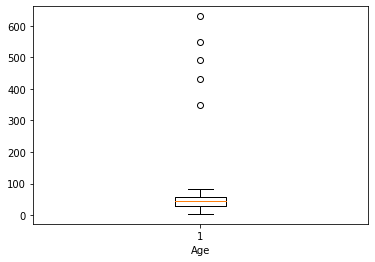

In [34]:
plt.boxplot(df.Age)
plt.xlabel('Age')
plt.show()

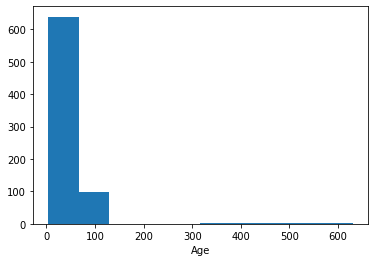

In [35]:
plt.hist(df.Age)
plt.xlabel('Age')
plt.show()

### Nadzirano strojno ucenje

In [36]:
df.columns

Index(['Sex', 'Age', 'Category', 'Survived', 'Country_Belarus',
       'Country_Canada', 'Country_Denmark', 'Country_Estonia',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Great Britain', 'Country_Latvia', 'Country_Lithuania',
       'Country_Nigeria', 'Country_Norway', 'Country_Russia',
       'Country_Sweden'],
      dtype='object')

In [37]:
X = df.drop('Survived', axis=1)

In [38]:
y = df.loc[:, 'Survived']

#### Train test split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/Users/svenskender/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = cross_val_predict(logistic, X_test, y_test, cv=10)

/Users/svenskender/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       204
           1       0.50      0.17      0.25        41

    accuracy                           0.83       245
   macro avg       0.68      0.57      0.58       245
weighted avg       0.79      0.83      0.80       245



In [43]:
# koeficijenti
logistic.coef_

array([[ 1.51699507, -0.05167348, -0.66073202, -0.05615713, -0.00908148,
        -0.49516891,  0.07641696, -0.27188415, -0.05360096, -0.26528462,
         0.61189814,  0.75234821, -0.11885929, -0.17816212, -0.21117248,
        -0.1290771 ,  0.29981444]])

In [44]:
# zemlje s najvecom vjerojatnosti prezivljavanja
pd.Series(logistic.coef_[0], index=X_test.columns)

Sex                      1.516995
Age                     -0.051673
Category                -0.660732
Country_Belarus         -0.056157
Country_Canada          -0.009081
Country_Denmark         -0.495169
Country_Estonia          0.076417
Country_Finland         -0.271884
Country_France          -0.053601
Country_Germany         -0.265285
Country_Great Britain    0.611898
Country_Latvia           0.752348
Country_Lithuania       -0.118859
Country_Nigeria         -0.178162
Country_Norway          -0.211172
Country_Russia          -0.129077
Country_Sweden           0.299814
dtype: float64